#  **MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

#### **Importing the Dependencies**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


#### **Loading the MNIST data from keras.datasets**

In [5]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
type(x_train)

numpy.ndarray

In [7]:
## Shape of the numpy arrays

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Train data - 60000 images


Test data - 10000 images

Image dimension --> 28 x 28

Gray scale --> 1 channel

In [8]:
## Printing the 10th image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(x_train[10].shape)

(28, 28)


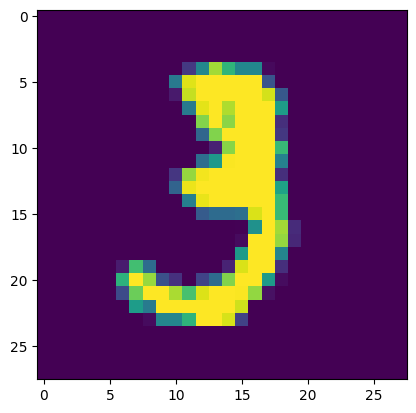

Label: 3


In [10]:
## Display the image

plt.imshow(x_train[10])
plt.show()

## printing the corresponding label
print("Label:", y_train[10])

Image Labels

In [11]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [12]:
# Unique values in y_train

print("Unique values in y_train:", np.unique(y_train))

# Unique values in y_test

print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


All the images have the same dimesnions in this dataset. If not, we should resize all the images


### **Scaling the values**

In [13]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [14]:
### Print the 10th image

print(x_train_scaled[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### **Building the Neural Network**

In [15]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(75, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation ='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# compiling the neural network

model.compile(optimizer = 'Adam',
              loss = ['sparse_categorical_crossentropy'],
              metrics= ['accuracy'])

In [17]:
# Training the Neural Network

history = model.fit(x_train_scaled, y_train, epochs = 10, validation_split = 0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8402 - loss: 0.5282 - val_accuracy: 0.9457 - val_loss: 0.1780
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9568 - loss: 0.1464 - val_accuracy: 0.9584 - val_loss: 0.1321
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9705 - loss: 0.1016 - val_accuracy: 0.9655 - val_loss: 0.1097
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9766 - loss: 0.0766 - val_accuracy: 0.9638 - val_loss: 0.1161
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9810 - loss: 0.0607 - val_accuracy: 0.9679 - val_loss: 0.1121
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9668 - val_loss: 0.1183
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9895 - loss: 0.0361 - val_accuracy: 0.9644 - val_loss: 0.1306
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0323 - 

Training data accuracy = 99.06%

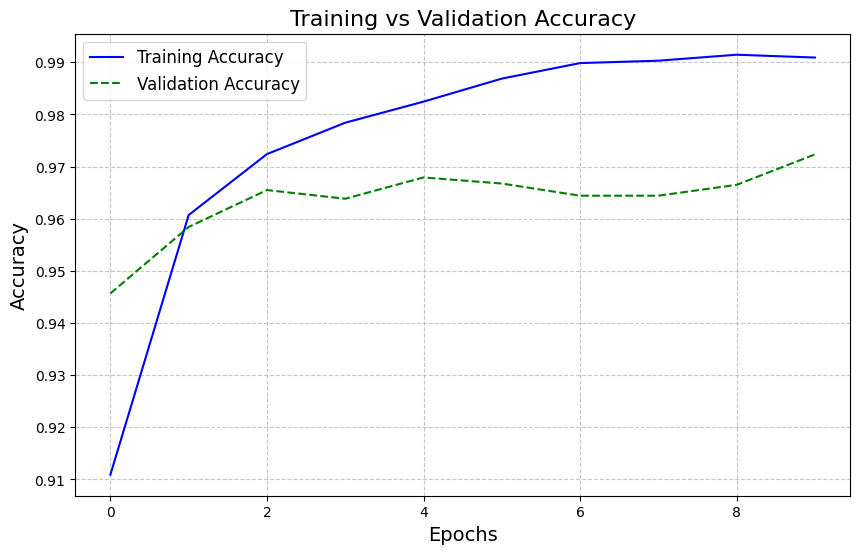

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--')
plt.title('Training vs Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


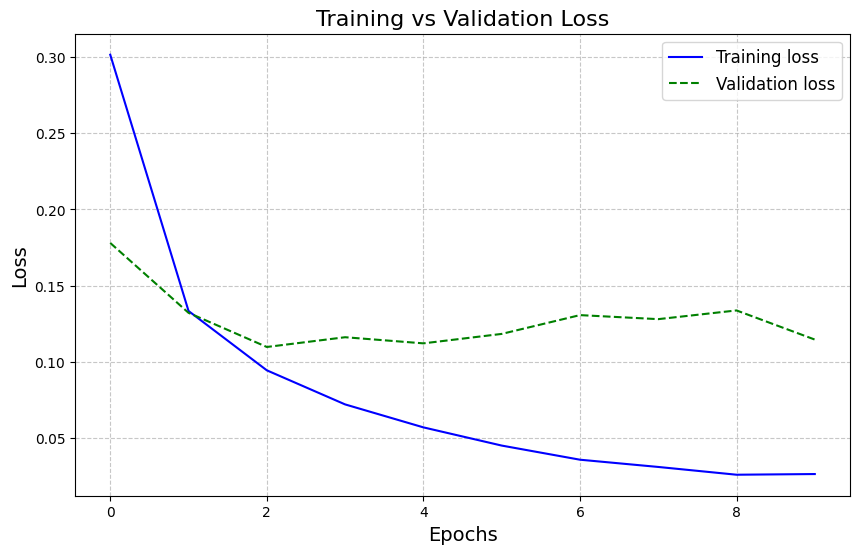

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation loss', color='green', linestyle='--')
plt.title('Training vs Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

#### **Accuracy on Test Data:**

In [20]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1365
0.9721999764442444


Test data accuracy = 97.21%

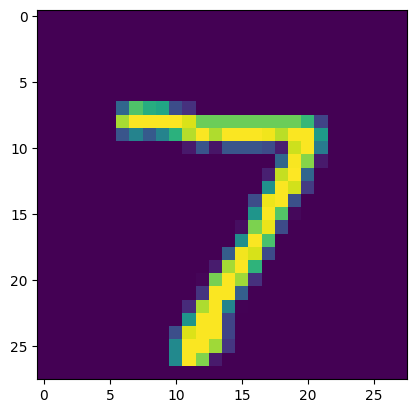

In [21]:
# Printing the first data point in test data

plt.imshow(x_test_scaled[0])
plt.show()

In [22]:
print(y_test[0])

7


In [23]:
y_pred = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
print(y_pred[0])

[3.4027763e-12 8.4493358e-12 1.2848565e-10 8.1605602e-09 2.1384783e-13
 1.2681337e-12 1.8016446e-21 9.9999982e-01 2.6864144e-10 6.5280716e-08]


#### **Converting prediction probabilities to class label**

In [25]:
Label_for_first_image = np.argmax(y_pred[0])
print(Label_for_first_image)

7


#### **Converting the prediction probabilities to class label for all test data points**

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### **Confusion Matrix**

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)


In [29]:
print(conf_matrix)

tf.Tensor(
[[ 956    0    3    1    2    4    8    2    3    1]
 [   0 1122    0    1    0    2    2    3    4    1]
 [   3    3  985   15    2    2    3   16    3    0]
 [   0    1    1  983    0   10    1    4    3    7]
 [   2    3    2    1  952    0    5    2    2   13]
 [   3    0    0    7    1  875    2    1    2    1]
 [   2    3    1    2    5    6  935    1    2    1]
 [   1    3    6    1    0    0    0 1008    0    9]
 [   0    1    5   14    5    9    2    6  926    6]
 [   2    2    0    5    9    8    1    2    0  980]], shape=(10, 10), dtype=int32)


Text(0.5, 1.0, 'Heatmap of Actual vs Predicted Values for MNIST Classification')

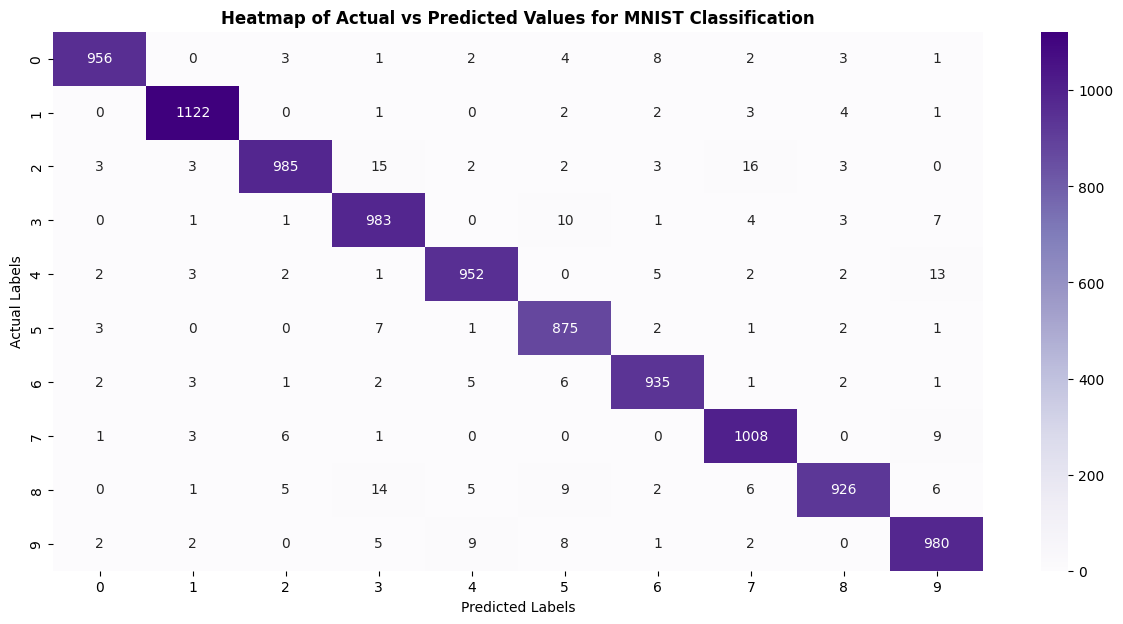

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap='Purples')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Heatmap of Actual vs Predicted Values for MNIST Classification", fontweight = 'bold')

# **Building predictive System**

In [33]:
input_image_path = '/content/MNIST_digit.png'

In [35]:
input_image = cv2.imread(input_image_path)


In [36]:
type(input_image)

numpy.ndarray

In [37]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


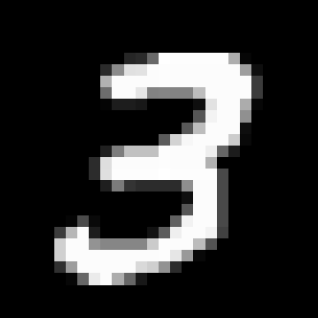

In [39]:
cv2_imshow(input_image)

In [40]:
input_image.shape

(318, 318, 3)

#### ***Details***

##### 318 pixels width

##### 318 pixels height

#####color channel - 3 (RGB)

##### Should convert the image into grey scale since it is RGB

In [41]:
# Color conversion

grey_scale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [46]:
grey_scale.shape

(318, 318)

In [43]:
# resize the image

input_image_resize = cv2.resize(grey_scale,(28,28))

In [44]:
input_image_resize.shape

(28, 28)

In [47]:
cv2_imshow(input_image_resize)

In [48]:
# scale the values
input_image_resize = input_image_resize/255

In [49]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [50]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[5.3208292e-26 3.7681594e-17 7.0332381e-19 1.0000000e+00 5.9033147e-20
  2.5329589e-11 1.9425540e-26 4.7628753e-16 6.3813687e-14 1.4203905e-10]]


In [51]:
input_pred_label = np.argmax(input_prediction)
input_pred_label

3

**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


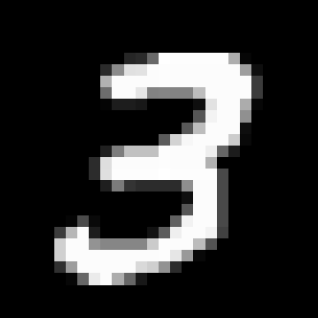

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Handwritten digit is recognized as 3


In [52]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grey_scale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print("Handwritten digit is recognized as",input_pred_label)